In [1]:
%matplotlib inline

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors

from scipy.spatial.distance import cosine

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from crawler import flatten_data

In [2]:
from wordcloud import WordCloud, STOPWORDS

from sklearn.metrics import mean_squared_error

import pickle

import pandas as pd

In [3]:
anime_info = pd.read_pickle('data/anime_info.pickle')

In [4]:
with open('data/processed11.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [5]:
# def flatten(l):
#     return [item for sublist in l for item in sublist]

In [6]:
data = flatten_data(data)

In [7]:
# with open('processed1.pickle', 'rb') as handle:
#     data1 = pickle.load(handle)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

# tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

In [9]:
#Get list of reviews
reviews = []
for i in data.keys():
    for j in data[i]:
        #j is not list
        if type(j) is not list:
            reviews.append(j)
        #j is list
        else:
            for k in j:
                reviews.append(k)

In [10]:
print(f"Number of anime: {len(data.keys())}")
print(f"Number of review: {len(reviews)}")

Number of anime: 30
Number of review: 711


In [11]:
def get_key(val):
    for key, value in data.items():
         if val in value:
             return key
def get_id(index):
    return get_key(reviews[index])

In [12]:
vec = TfidfVectorizer()
X = vec.fit_transform(reviews)

In [13]:
doc_term_matrix = X.toarray()

In [14]:
print(doc_term_matrix.shape)

(711, 5718)


In [27]:
#Music related
#Unique art style
test_string = "Anime with basketball"

In [28]:
sparse_matrix = vec.fit_transform([test_string]+reviews)
cosine = cosine_similarity(sparse_matrix[0,:],sparse_matrix[1:,:])

In [29]:
print(pd.DataFrame({'cosine':cosine[0],'strings':reviews}).sort_values('cosine',ascending=False))

       cosine                                            strings
692  0.084064   This anime is heart warming and mild comedic ...
307  0.081442   It's a very touching slice of life with great...
304  0.078076   The anime is an anime everyone should watch a...
392  0.073988   This anime could possibly become my favourite...
266  0.071443   [ANIME_NAME] is hands down one of the best sl...
..        ...                                                ...
370  0.000000   At times it seemed to jump around a bit, but ...
363  0.000000   The plot of the series was to get a bunch of ...
362  0.000000   Hirasawa [FEMALE_CHAR] gets the most developm...
361  0.000000   [ANIME_NAME] is one of those rare shows that ...
710  0.000000   The story did a stunning job showing [CHAR] M...

[711 rows x 2 columns]


In [30]:
anime_id = get_key(reviews[95])
anime_info[anime_id].names

['さらい屋 五葉', 'Saraiya Goyou', 'House of Five Leaves']

In [31]:
result = pd.DataFrame({'cosine':cosine[0],'strings':reviews}).sort_values('cosine',ascending=False)

In [32]:
print(result['cosine'])

692    0.084064
307    0.081442
304    0.078076
392    0.073988
266    0.071443
         ...   
370    0.000000
363    0.000000
362    0.000000
361    0.000000
710    0.000000
Name: cosine, Length: 711, dtype: float64


In [33]:
#Remove reviews with cosine similarity equal to 0
filtered_result = result.loc[~(result['cosine']==0)]

In [34]:
summary = {}
ids1 = filtered_result.index[:10]
def review_summary(data):
    for index in data.index[:].tolist():
        if len(anime_info[get_id(index)].names) == 3:
            title = anime_info[get_id(index)].names[2]  
        else:
            title = anime_info[get_id(index)].names[1]
        # summary[title] = data.loc[index]['strings']
        if title not in summary.keys():
            summary[title] = [data.loc[index]['cosine']]
        else:
            summary[title].append(data.loc[index]['cosine'])

In [35]:
review_summary(filtered_result)

In [36]:
recc = {}
for k,v in summary.items():
    if len(v) > 1:
        # recc[k] = np.mean(v)
        recc[k] = np.mean(v[:5])

In [37]:
def get_recommendation(data):
    return sorted(recc.items(), key=lambda x: x[1], reverse=True)

In [38]:
rank = get_recommendation(recc)
for i in range(len(recc) if len(recc) < 10 else 10):
    print(f"Top {i+1}: {rank[i][0]} - {rank[i][1]}")

Top 1: K-ON! - 0.0740493067638825
Top 2: My Roommate is a Cat - 0.060047696024826305
Top 3: Clannad: After Story - 0.05132819196847862
Top 4: House of Five Leaves - 0.049072129914068605
Top 5: Gate 2 - 0.04310388366480506
Top 6: Digimon: Digital Monsters - 0.0391512001642648
Top 7: Made in Abyss - 0.034845011682372175
Top 8: Is the Order a Rabbit?? ～Dear My Sister～ - 0.032103912854584825
Top 9: Lupin the 3rd Part 2 - 0.031420190596214294
Top 10: Gintama Season 5 - 0.026069520226324673


In [61]:
#Write recommendation result to pandas dataframe
recommendation = pd.DataFrame(columns=['anime_title','score'])
for i in range(len(recc) if len(recc) < 10 else 10):
    recommendation.loc[i] = [rank[i][0],rank[i][1]]

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

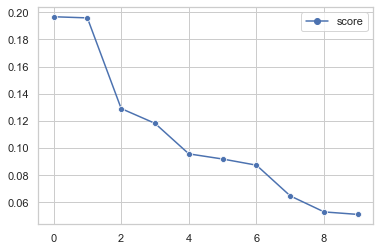

In [80]:
#Plot recommendation result
sns.lineplot(data=recommendation,markers=True)
plt.savefig('recommendation.png')
plt.show()

<Figure size 432x288 with 0 Axes>

In [53]:
ids = result.index[:].tolist()
for i in ids[:10]:
    print(anime_info[get_id(i)].names[2])

House of Five Leaves
House of Five Leaves
Made in Abyss
K-ON!
Digimon: Digital Monsters
K-ON!
K-ON!
K-ON!
K-ON!
K-ON!


In [54]:
def vect_cos(vect, test_list):
    """ Vectorise text and compute the cosine similarity """
    query_0 = vect.transform([' '.join(vect.get_feature_names())])
    query_1 = vect.transform(test_list)
    cos_sim = cosine_similarity(query_0.A, query_1.A)  # displays the resulting matrix
    return query_1, np.round(cos_sim.squeeze(), 3)

In [55]:
test_string = "anime with unique art style"
train = [test_string]
# vectorizer = CountVectorizer(stop_words='english').fit(train)
vectorizer = CountVectorizer().fit(train)
vectorizer.vocabulary_

{'anime': 0, 'with': 4, 'unique': 3, 'art': 1, 'style': 2}

In [56]:
print("cosine similarity for test string and anime")
for id in data.keys():
    
    vect, cos = vect_cos(vectorizer, [' '.join(data[id])])
    print('\n {} : {}.'.format(anime_info[id].names[-1],cos))

cosine similarity for test string and anime

 Gintama Season 5 : 0.674.

 Made in Abyss : 0.837.

 HAIKYU!! 2nd Season : 0.632.

 Code Geass: Lelouch of the Rebellion R2 : 0.767.

 Clannad: After Story : 0.67.

 The Tale of The Princess Kaguya : 0.894.

 Ghost in the Shell 2.0 : 0.849.

 Fullmetal Alchemist: Brotherhood : 0.775.

 One-Punch Man : 0.693.

 Nodame Cantabile Finale Special : 0.0.

 Saint Seiya: The Hades Chapter - Inferno : 0.632.

 Lupin the 3rd Part 2 : 0.701.

 House of Five Leaves : 0.851.

 Noragami OVA : 0.814.

 Miss Kobayashi's Dragon Maid: Valentines and Hot Springs! (Please Don't Get Your Hopes Up) : 0.447.

 Kuroko no Basket 2 NG-shuu : 0.447.

 K-ON!: Live House! : 0.0.

 InuYasha the Movie 3: Swords of an Honorable Ruler : 0.632.

 Hidamari Sketch x Hoshimittsu Specials : 0.0.

 Haikyuu!! the Movie: The Winner and the Loser : 0.0.

 Is the Order a Rabbit?? ～Dear My Sister～ : 0.542.

 Legend of the Galactic Heroes: Die Neue These Second : 0.447.

 Monthly Girl

e:\Python\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
e:\Python\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
e:\Python\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
e:\Python\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and

In [98]:
tgt_transform = vec.transform([test_string]).toarray()
tgt_cosine = cosine_similarity(doc_term_matrix,tgt_transform)

In [41]:
import numpy as np

In [42]:
print(tgt_cosine)
#Print highest cosine similarity index
print(np.argmax(tgt_cosine))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
0


In [63]:
print(reviews[np.argmax(tgt_cosine)])

 Art 9/10: It is great, especially the actions during the critical moments in the game . The pacing is a bit slow until the last 4-5 episodes . There are many very different characters . Most characters are stereotypes and there is not much development . Overall 8/10 .


In [64]:
reviews[5]

' Art 9/10: It is great, especially the actions during the critical moments in the game . The pacing is a bit slow until the last 4-5 episodes . There are many very different characters . Most characters are stereotypes and there is not much development . Overall 8/10 .'